<h1>Prediksi Customer Churn dengan Decision Tree</h1>

## Decision Tree

__Decision Tree__ adalah salah satu algoritma <i>machine learning</i> yang memiliki struktur seperti pohon yang dapat digunakan untuk kasus <i>supervised learning</i> baik klasifikasi maupun regresi, namun lebih sering digunakan untuk kasus klasifikasi. 

Dalam <i>decision tree</i> terdapat dua jenis node, yaitu __decision node__ dan __leaf node__. <i>Decision node</i> mewakili fitur dari dataset dan digunakan untuk membuat keputusan. <i>leaf node</i> adalah output dari keputusan tersebut dan tidak berisi cabang lebih lanjut.

Ada dua cara untuk menentukan fitur terbaik yang akan dijadikan <i>root node</i> dan juga <i>sub-nodes</i>, yaitu __Information Gain__ (__Entropy__) dan __Gini Index__. 

* Information gain : Pengukuran perubahan entropy setelah segmentasi kumpulan data berdasarkan atribut.
* Gini index : Ukuran <i>impurity</i> atau <i>purity</i> yang digunakan ketika membuat <i>decision tree</i> dalam algoritma CART (Classification and Regression Tree).

Dalam implementasi di Python, dapat memberikan argumen <code>criterion = 'entropy'</code> atau <code>criterion = 'gini'</code>.

## Dataset

Dataset <a href="https://www.kaggle.com/blastchar/telco-customer-churn">Telco Customer Churn</a>

tujuan untuk memprediksi apakah pelanggan berhenti menggunakan produk atau tidak.

Dataset ini terdiri dari sejumlah kolom yang berisi informasi tentang:

* Layanan yang digunakan pelanggan, yaitu kolom <code>PhoneService</code>, <code>MultipeLines</code>, <code>InternetService</code>, <code>OnlineSecurity</code>, <code>OnlineBackup</code>, <code>DeviceProtection</code>, <code>TechSupport</code>, <code>StreamingTV</code>, <code>StreamingMovies</code>.
* Informasi akun pelanggan, yaitu kolom <code>tenure</code>, <code>Contract</code>, <code>PaperlessBilling</code>, <code>PaymentMethod</code>, <code>MonthlyCharges</code>, <code>TotalCharges</code>.
* Informasi demografi pelanggan, yaitu kolom <code>gender</code>, <code>SeniorCitizen</code>, <code>Partner</code>, <code>Dependents</code>.

Target kolomnya yaitu kolom <code>Churn</code> yang berisi tentang data pelanggan yang berhenti menggunakan produk dalam sebulan terakhir.

<i>import library</i> terlebih dahulu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<i>load</i> dataset ke dalam dataframe Pandas.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset 

df = pd.read_csv('Telco-Customer-Churn.csv')

pd.set_option('display.max_columns', 50)      # menampilkan seluruh kolom
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<hr>

## Analisis dan visualisasi data

cek info dataframe <code>df</code>.

In [5]:
# Cek info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


visualisasi jumlah kelas/kategori pada kolom <code>Churn</code> dengan <code>countplot()</code>.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


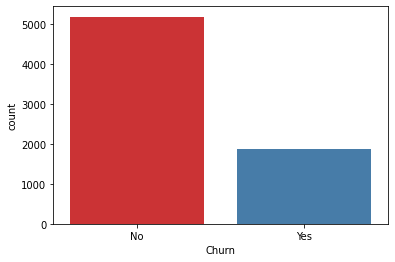

In [6]:
# Memvisualisasikan jumlah data pada kolom 'Churn'

sns.countplot(df['Churn'], palette='Set1')

visualisasikan jumlah data pada kolom <code>Churn</code> berdasarkan <code>gender</code>.

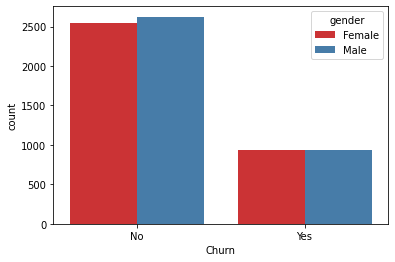

In [7]:
# Visualisasi kolom 'Churn' berdasarkan 'gender'

sns.countplot(x='Churn', hue='gender', data=df, palette='Set1')

cek jumlah pelanggan yang melakukan kontrak perbulan, satu tahun, atau dua tahun dengan <code>value_counts()</code>.

In [8]:
# Menampilkan jumlah data untuk tiap kategori di kolom 'Contract'

df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

visualisasi data <code>PaymentMethod</code> berdasarkan <code>gender</code>.

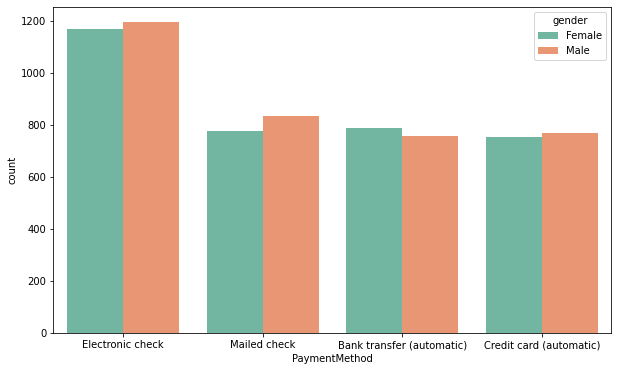

In [9]:
# Menampilkan data 'PaymentMethod' berdasarkan 'gender'

plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='gender', data=df, palette='Set2')

menganalisis langsung dua plot atau lebih dengan menggunakan subplot.

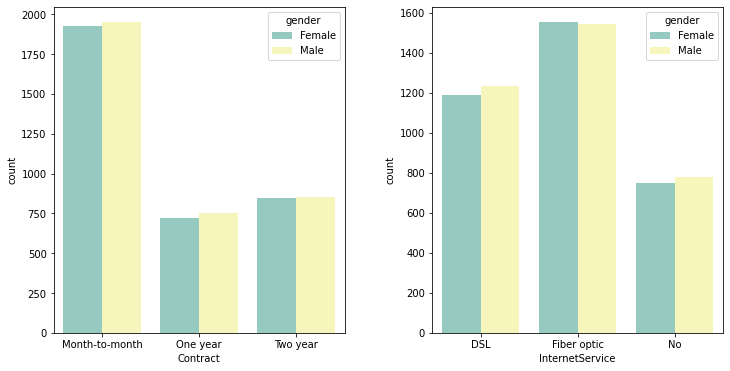

In [10]:
# Menampilkan countplot

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0]) 
ax1 = fig.add_subplot(ax[1])    

sns.countplot(x='Contract', hue='gender', data=df, palette='Set3', ax=ax0)
sns.countplot(x='InternetService', hue='gender', data=df, palette='Set3', ax=ax1)

plt.subplots_adjust(wspace=0.3)
plt.show()

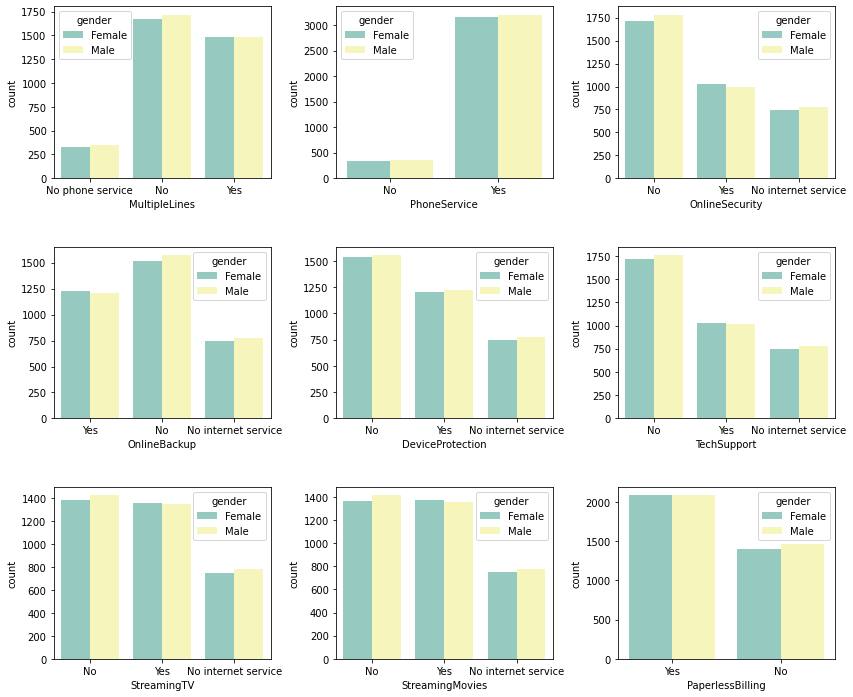

In [11]:
# Menampilkan countplot

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(14, 12)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[1,0]) 
ax4 = fig.add_subplot(ax[1,1])  
ax5 = fig.add_subplot(ax[1,2]) 
ax6 = fig.add_subplot(ax[2,0]) 
ax7 = fig.add_subplot(ax[2,1]) 
ax8 = fig.add_subplot(ax[2,2]) 

sns.countplot(x='MultipleLines', hue='gender', data=df, palette='Set3', ax=ax0)
sns.countplot(x='PhoneService', hue='gender', data=df, palette='Set3', ax=ax1)
sns.countplot(x='OnlineSecurity', hue='gender', data=df, palette='Set3', ax=ax2)
sns.countplot(x='OnlineBackup', hue='gender', data=df, palette='Set3', ax=ax3)
sns.countplot(x='DeviceProtection', hue='gender', data=df, palette='Set3', ax=ax4)
sns.countplot(x='TechSupport', hue='gender', data=df, palette='Set3', ax=ax5)
sns.countplot(x='StreamingTV', hue='gender', data=df, palette='Set3', ax=ax6)
sns.countplot(x='StreamingMovies', hue='gender', data=df, palette='Set3', ax=ax7)
sns.countplot(x='PaperlessBilling', hue='gender', data=df, palette='Set3', ax=ax8)

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

Untuk data numerik, lihat histogramnya. Mari kita cek dahulu tipe datanya.

In [12]:
# cek tipe data kolom numerik

df[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

Karena kolom <code>TotalCharges</code> masih bertipe object, ubah dulu tipe datanya menggunakan <code>to_numeric()</code> dari Pandas.

In [13]:
# mengubah tipe data kolom TotalCharges menjadi numerik

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')     

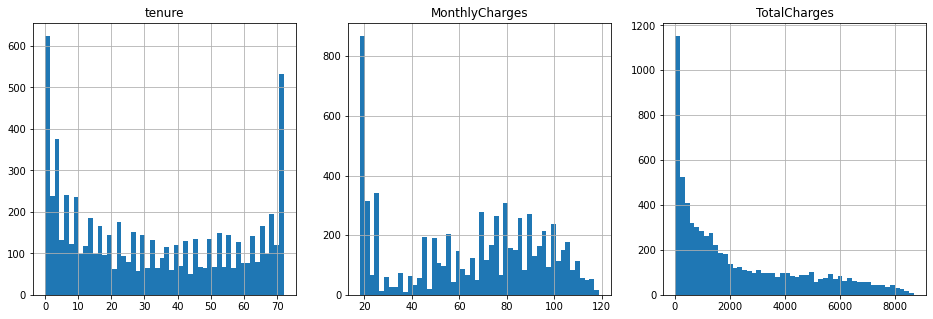

In [14]:
# Menampilkan histogram

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16, 5)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0]) 
ax1 = fig.add_subplot(ax[1])  
ax2 = fig.add_subplot(ax[2])   

# Subplot ax[0]: tenure
df.hist(column='tenure', bins=50, ax=ax0)

# Subplot ax[1]: MonthlyCharges
df.hist(column='MonthlyCharges', bins=50, ax=ax1)

# Subplot ax[2]: TotalCharges
df.hist(column='TotalCharges', bins=50, ax=ax2)

plt.subplots_adjust(wspace=0.2)
plt.show()

## Data Preparation / Preprocessing

In [15]:
# Mendefinisikan data fitur dan target

df_features = df.drop(['customerID', 'Churn'], axis=1)
df_target = df['Churn']

cek <code>df_features</code>.

In [16]:
# Menampilkan 5 data teratas

df_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Menangani missing values

cek apakah ada <i>missing values</i> dalam dataframe ini.

In [17]:
# Mengecek missing values

df_features.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

Ternyata ada 11 <i>missing values</i> pada kolom <code>TotalCharges</code>, sehingga harus menanganinya terlebih dahulu. isi nilai yang hilang tersebut dengan nilai rata-rata kolomnya.

In [18]:
# Menangani missing values

df_features['TotalCharges'].fillna(df_features['TotalCharges'].mean(), inplace=True)

### Encoding

 <i>encoding</i> data non-numerik menggunakan <code>.cat.codes</code>. Namun, sebelumnya ubah dulu tipe data kolom non-numerik dari <i>object</i> menjadi <i>category</i>.

In [19]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod']

# mengubah tipe data kolom bertipe object menjadi category
df_features[cols] = df_features[cols].astype('category')

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [20]:
# Data encoding

for col in cols:
    df_features[col] = df_features[col].cat.codes

df_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


### Normalisasi

menormalisasi dataframe tersebut agar <i>range</i> nilai antar kolomnya tidak terlalu jauh.

In [21]:
from sklearn.preprocessing import StandardScaler

# normalisasi data / scaling data
scale = StandardScaler().fit_transform(df_features)

# mendefinisikan nama kolom
cols = list(df_features.columns)

# membuat dataframe untuk menampilkan hasil scaling pada dataframe
df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


### Train test split

Selanjutnya lakukan <i>train test split</i>.

In [22]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target, test_size=0.2, random_state=3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 19) (5634,)
Test set: (1409, 19) (1409,)


<hr>

## Modeling 

### Klasifikasi dengan Decision Tree

Membuat model klasifikasi dengan <i>decision tree</i> menggunakan <code>DecisionTreeClassifier</code>.

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(X_train, y_train)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

lakukan prediksi menggunakan data <code>X_test</code>.



In [24]:
# Prediksi dengan X_test

y_pred = model_dtree.predict(X_test)

tampilkan hasil dari prediksi (<code>y_pred</code>) dan juga hasil sebenarnya (<code>y_test</code>) untuk membandingkan.

In [25]:
# Menampilkan y_pred dan y_test

print(y_pred [0:5])
print(y_test [0:5])

['No' 'No' 'Yes' 'No' 'No']
808     Yes
1496     No
4326    Yes
492     Yes
2215     No
Name: Churn, dtype: object


### Evaluasi

evaluasi kinerja model dengan <code>accuracy_score</code>.

In [26]:
from sklearn.metrics import accuracy_score

# Menampilkan akurasi
print('Akurasi Decision Tree : ', accuracy_score(y_test, y_pred))

Akurasi Decision Tree :  0.7799858055358411


### Tree Visualization

visualisasi pohon dengan <i>package</i> tambahan yang sudah disediakan oleh Python, yaitu __pydotplus__, dan __python-graphviz__.

In [27]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [28]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

%matplotlib inline 

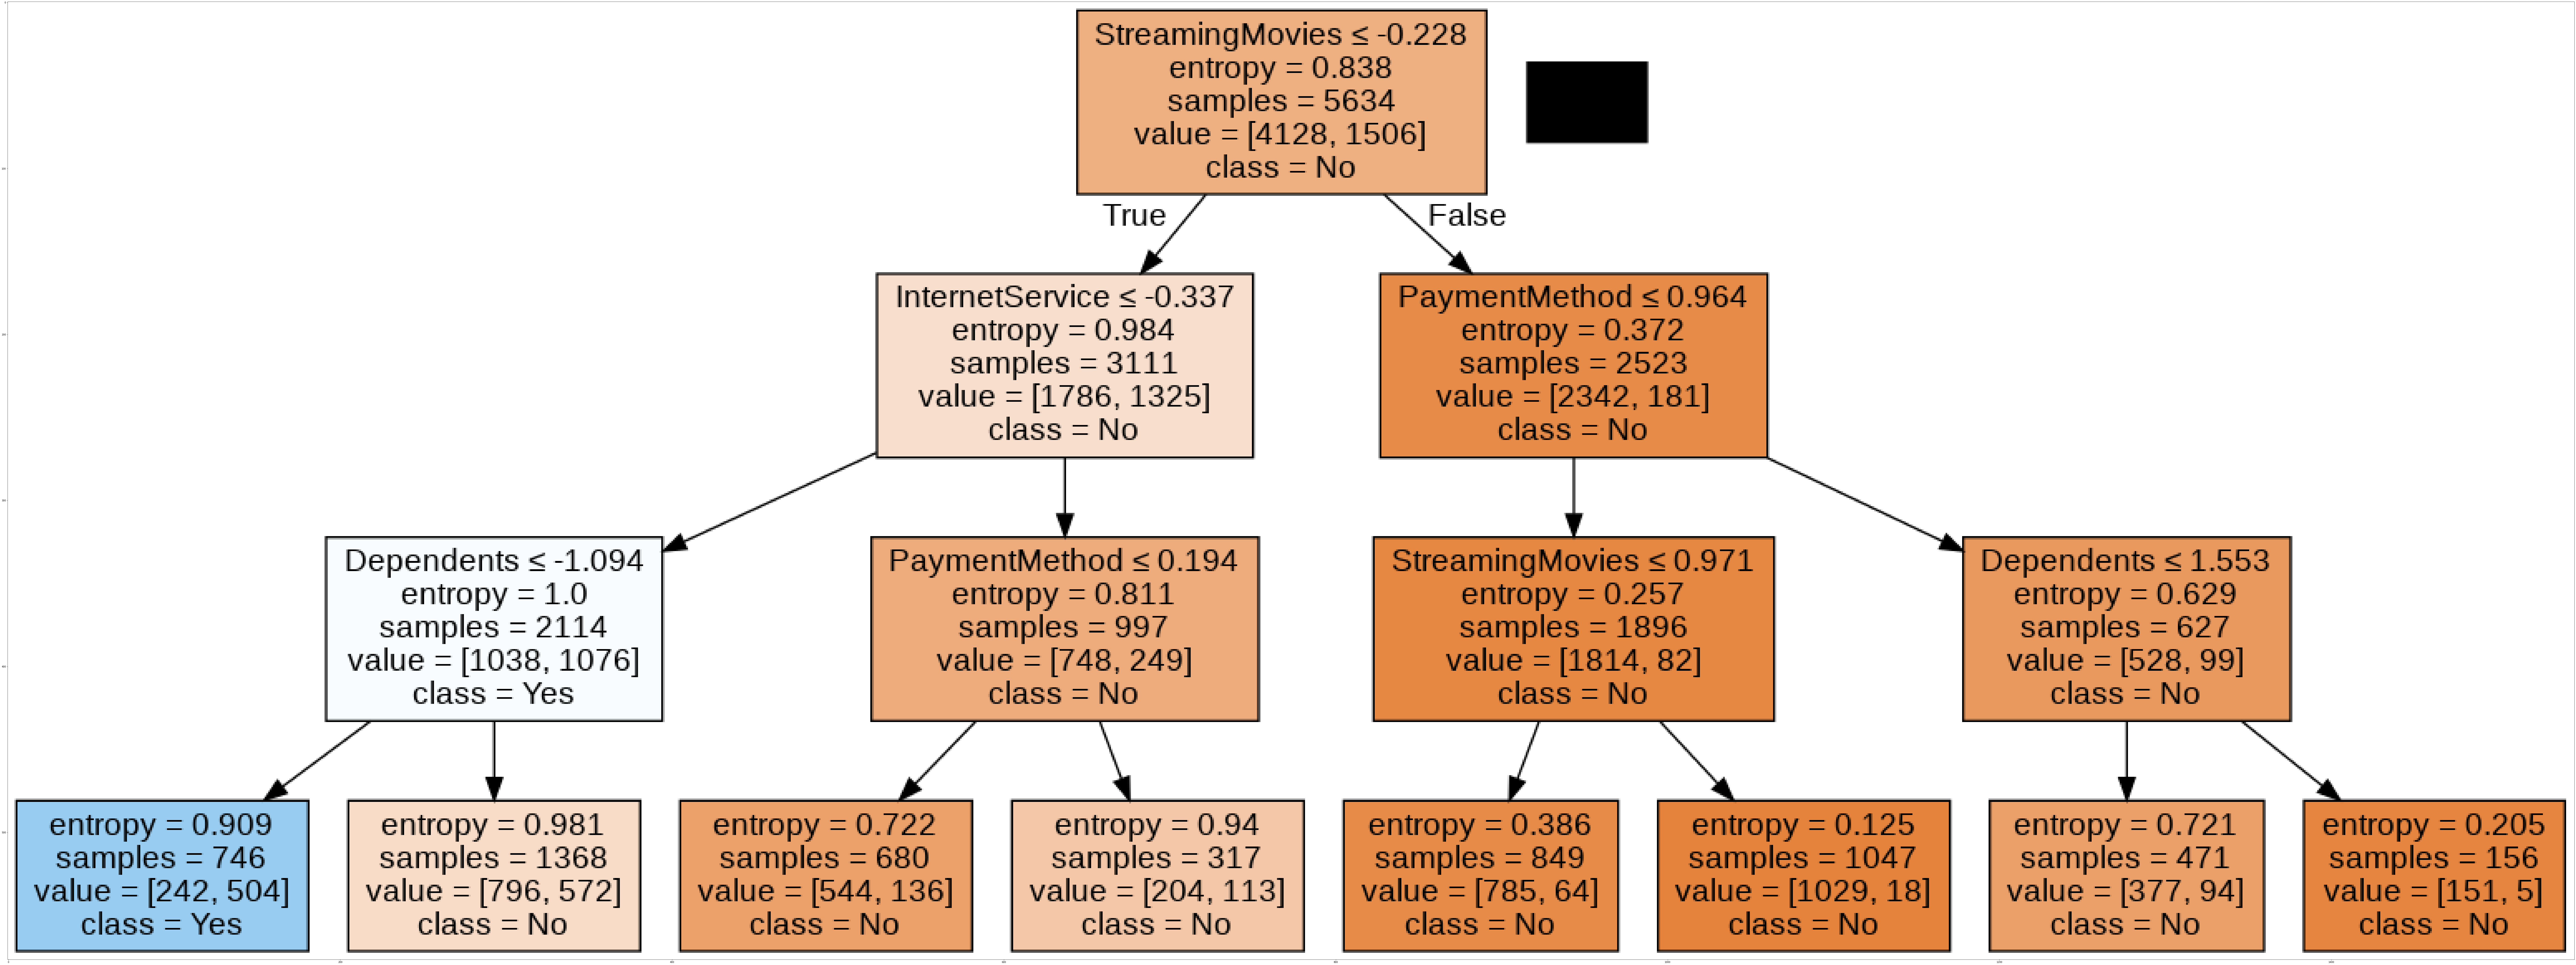

In [29]:
dot_data = StringIO()
filename = 'churn_tree.png'
featureNames = df.columns[0:19]
targetNames = df['Churn'].unique().tolist()
out = tree.export_graphviz(model_dtree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img,interpolation='nearest')



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


